### Import libraries

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


### Input & Output creation

In [2]:
# read file and create ouput file
input = 'C:/welead/project/project_root/data/mpg_data.xlsx'
output = 'C:/welead/project/project_root/'
if not os.path.exists(output):
    os.makedirs(output)
    
    sys.exit()
df = pd.read_excel(input)



In [3]:
# car name (last column) is ommitted, it does not add any value since all values are distinct
df = df.iloc[:, 0:9]
print(df.info())
print(df.describe())
df = df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displayments  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB
None
              mpg   cylinders  displayments  horsepower       weight  \
count  398.000000  406.000000    406.000000  400.000000   406.000000   
mean    23.514573    5.475369    194.779557  105.082500  2979.413793   
std      7.815984    1.712160    104.922458   38.768779   847.004328   
min      9.000000    3.000000     68.000000   46.000000  1613.00000

### EDA

In [4]:
# Display the first few rows of the DataFrame
print("\nData Preview:")
print(df.head())


Data Preview:
    mpg  cylinders  displayments  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


In [5]:
#Check for unique values 
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

mpg: 129 unique values
cylinders: 5 unique values
displayments: 83 unique values
horsepower: 93 unique values
weight: 356 unique values
acceleration: 96 unique values
model year: 13 unique values
origin: 3 unique values
car name: 312 unique values


In [6]:
#Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
mpg             8
cylinders       0
displayments    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [7]:
print("\nSummary Statistics of dataset:")
print(df.describe())


Summary Statistics of dataset:
              mpg   cylinders  displayments  horsepower       weight  \
count  398.000000  406.000000    406.000000  400.000000   406.000000   
mean    23.514573    5.475369    194.779557  105.082500  2979.413793   
std      7.815984    1.712160    104.922458   38.768779   847.004328   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    105.000000   75.750000  2226.500000   
50%     23.000000    4.000000    151.000000   95.000000  2822.500000   
75%     29.000000    8.000000    302.000000  130.000000  3618.250000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    406.000000  406.000000  406.000000  
mean      15.519704   75.921182    1.568966  
std        2.803359    3.748737    0.797479  
min        8.000000   70.000000    1.000000  
25%       13.700000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000

In [8]:
df.drop('car name', axis=1, inplace=True)

### Visualization of EDA

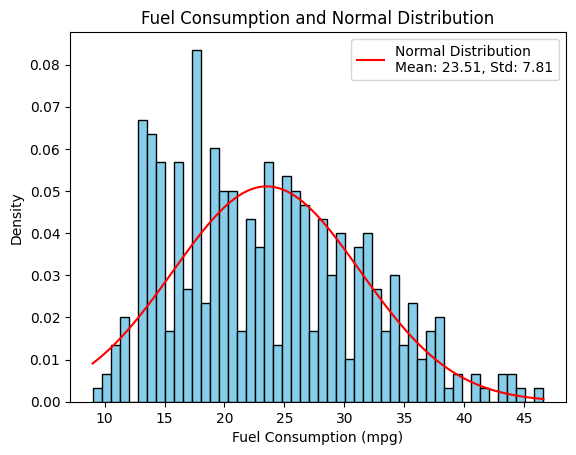

In [9]:
# Plot mpg vs normal distribution 

x1 = df['mpg']
mean, std = np.mean(x1), np.std(x1)

x = np.linspace(min(x1), max(x1), 100)
distr = stats.norm.pdf(x, mean, std)

plt.hist(x1, bins=50, color='skyblue', edgecolor='black', density=True)

#normal distribution plot
plt.plot(x, distr, color='red', label=f'Normal Distribution\nMean: {mean:.2f}, Std: {std:.2f}')

# plot details
plt.xlabel('Fuel Consumption (mpg)')
plt.ylabel('Density')
plt.title('Fuel Consumption and Normal Distribution')
plt.legend()
plt.savefig(os.path.join(output, 'fueldistrib.png' ))
plt.show()

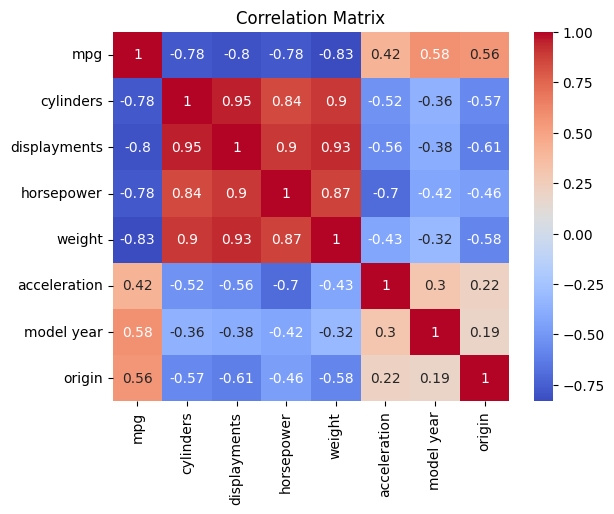

In [10]:
#correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

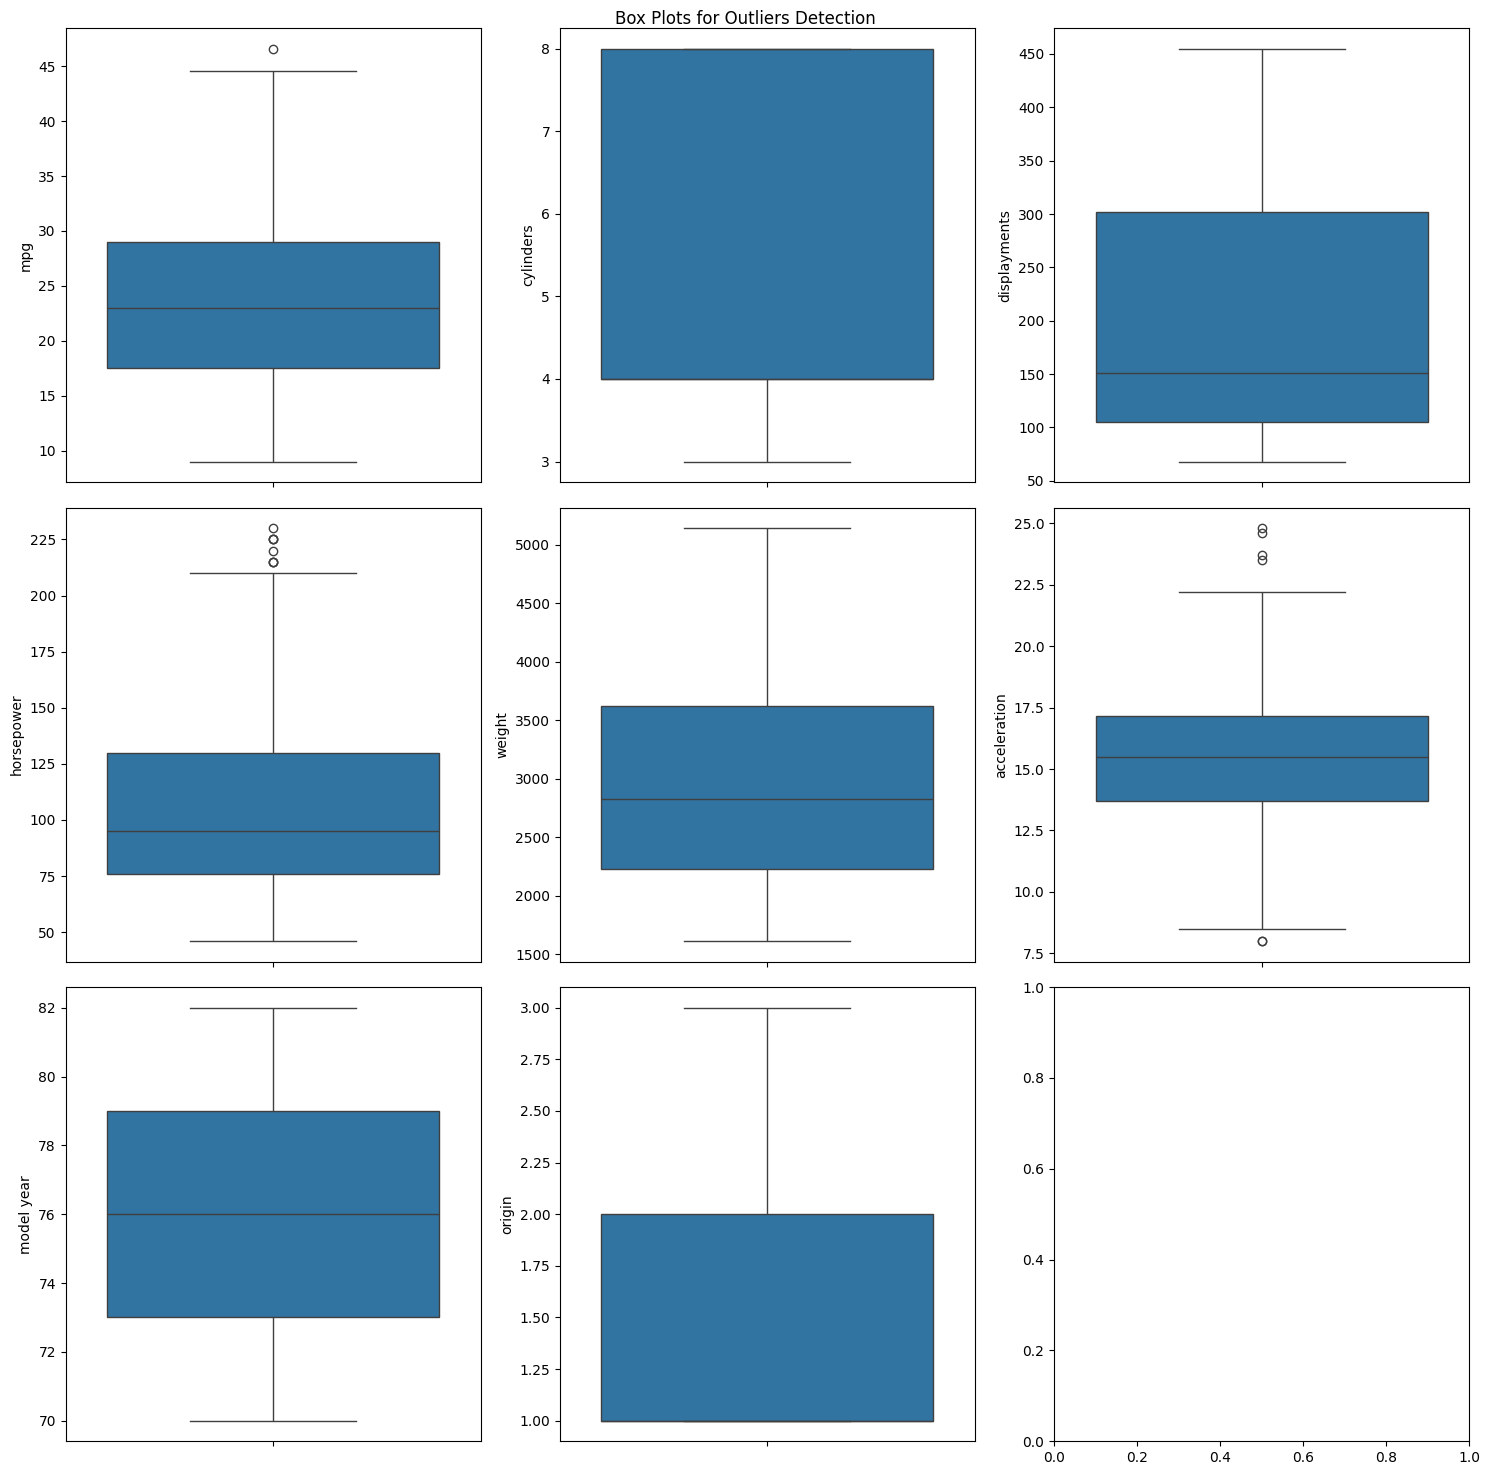

In [11]:
#Box plots for outliers detection
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Box Plots for Outliers Detection")
for i, col in enumerate(df.columns):
    sns.boxplot(y=col, data=df, ax=axes[i//3, i%3])
plt.tight_layout()
plt.show()


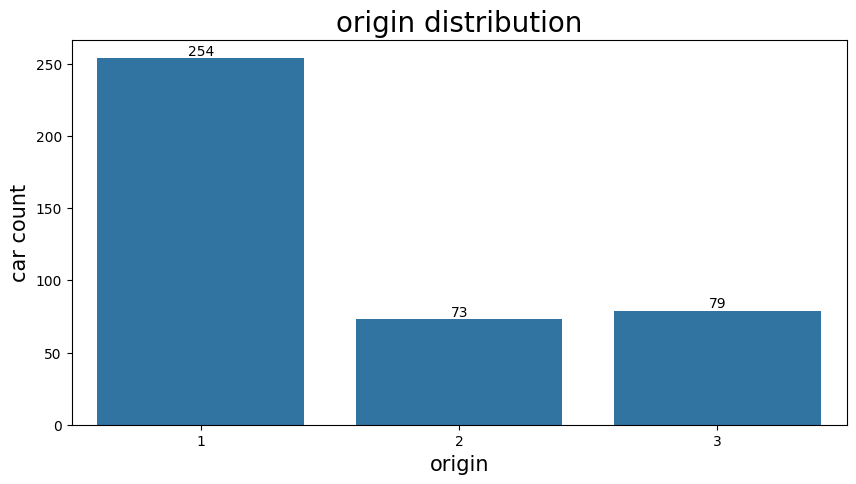

In [12]:
# ploting cars origin distribution
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'origin', data = df)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("origin distribution", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("car count", fontsize = 15)
plt.show()

<Axes: title={'center': 'model year vs mpg'}, xlabel='model year', ylabel='mpg'>

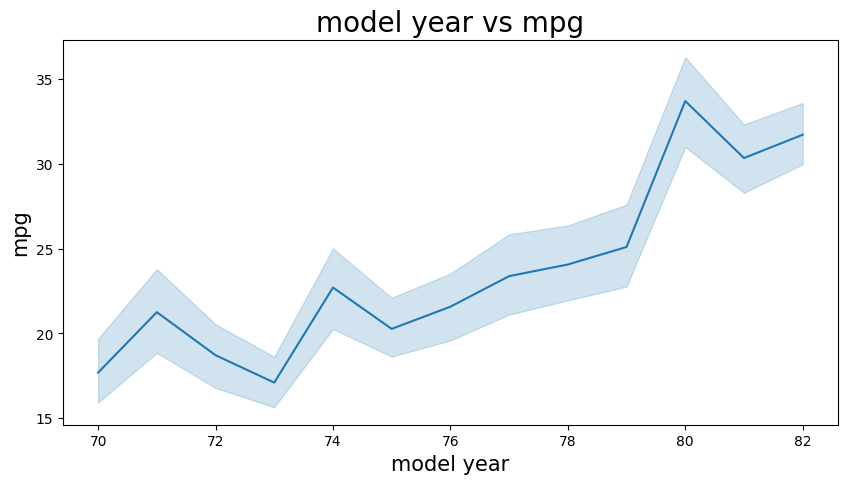

In [13]:
# ploting model year vs mpg
plt.figure(figsize=(10,5))
plt.title("model year vs mpg", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
sns.lineplot(x = 'model year', y = 'mpg', data = df)

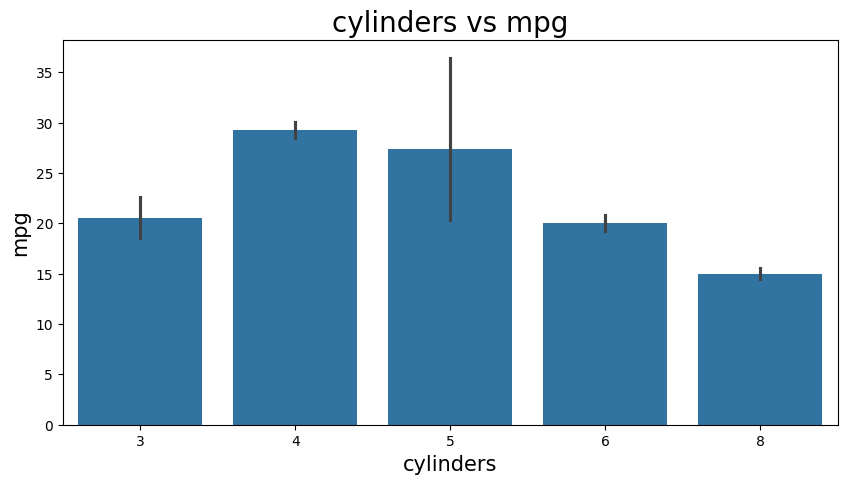

In [14]:
# ploting cylinders vs mpg
plt.figure(figsize=(10,5))
sns.barplot(x = 'cylinders', y = 'mpg', data =df)
plt.title("cylinders vs mpg", fontsize = 20)
plt.xlabel("cylinders", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show()

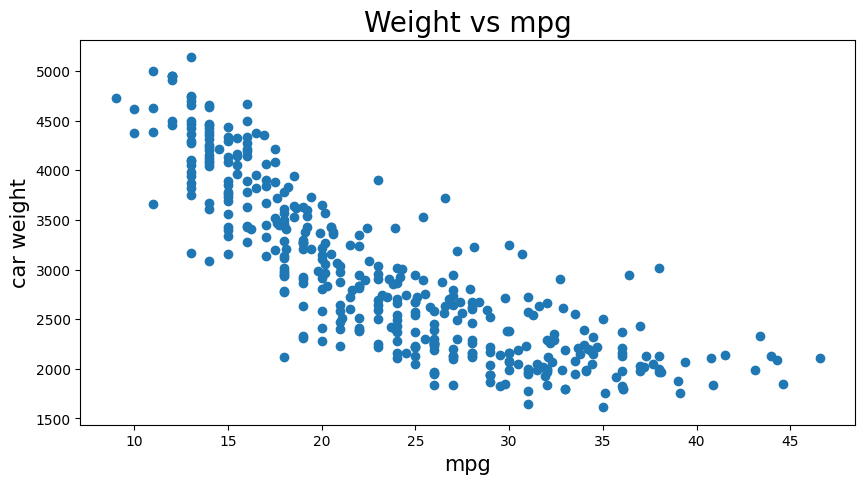

In [15]:
# plotting weight vs mpg
plt.figure(figsize=(10,5))
plt.scatter(x = 'mpg', y = 'weight', data = df)
plt.title("Weight vs mpg", fontsize = 20)
plt.xlabel("mpg", fontsize = 15)
plt.ylabel("car weight", fontsize = 15)
plt.show()

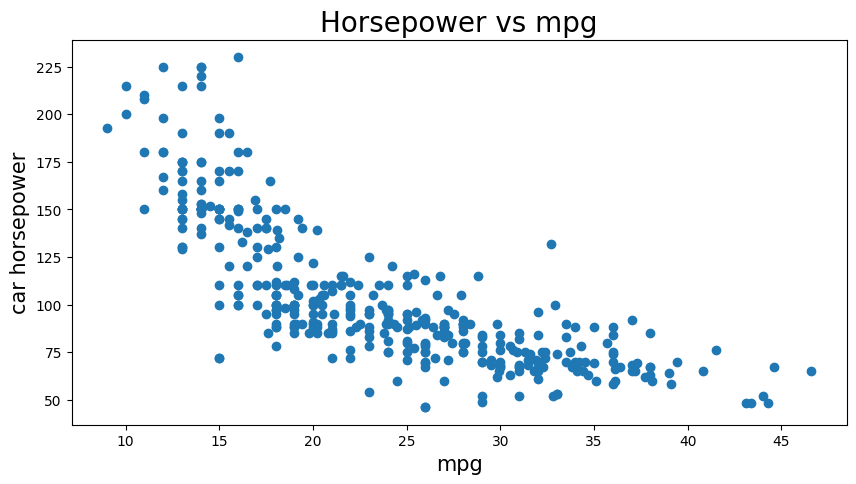

In [16]:
# plotting horsepower vs mpg
plt.figure(figsize=(10,5))
plt.scatter(x = 'mpg', y = 'horsepower', data = df)
plt.title("Horsepower vs mpg", fontsize = 20)
plt.xlabel("mpg", fontsize = 15)
plt.ylabel("car horsepower", fontsize = 15)
plt.show()